<a href="https://colab.research.google.com/github/ormorteey/BST-222-Survival-Analysis/blob/main/BST_222_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("pacman")
library("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
p_load("tidyverse", "googledrive", "KMsurv", "survival", "survminer", "ggplot2")

The addicts data set is from a study by Caplehorn et al. (“Methadone Dosage
and Retention of Patients in Maintenance Treatment,” Med. J. Aust., 1991). These
data comprise the times in days spent by heroin addicts from entry to departure
from one of two methadone clinics. There are two further covariates, namely, prison
record and methadone dose, believed to affect the survival times.
The data set and R input code are on the website. The variables are as follows:
* id: Subject ID
* clinic: Clinic (1 or 2)
* status: Survival status (0 = censored, 1 = departed from clinic)
* time: Survival time in days
* prison: Prison record (0 = none, 1 = any)
* methadone: Methadone dose (mg/day)

1. Plot the Kaplan-Meier survival curves for the two clinics.
2. Test for whether the two survival curves could have come from the same process using survdiff.
3. Plot the cumulative hazards from the Nelson-Aalen estimator.
4. A common comparison plot for proportional hazards is the complimentary
log-log survival plot which plots $ln(− ln[\hat S (x)]) = ln \hat H (t)$ against ln(t). If the
hazards are proportional, then so are the cumulative hazards, and after taking
logs, the curves should be parallel. If the lines are straight, then the Weibull
model may be appropriate. Make this plot for the two clinics using the Nelson-Aalen estimator and comment on the results. You will use the “cloglog” option
in the plot command.
5. Construct a Cox model using only the clinic variable. Is the “survival” different at the two clinics? What is the estimated hazard (risk) ratio, a test for
significance, and a 95% confidence interval?
6. Pick one test for the null hypothesis that the clinics do not differ. Why would
you depend on this test more than the others?
7. Consider adding the prison and methodone variables. Which of these covariates seems to improve the model?
8. Plot the two survival curves from your chosen Cox model and add the two KM
survival curves. What do you think?

In [ ]:
drive_deauth()
drive_user()
public_file = drive_get(as_id("1CXILLG1-6nRpczvQNnAWEpNdxKc0ed-2"))
drive_download(public_file, overwrite = TRUE)

ℹ Not logged in as any specific Google user.

File downloaded:

• addicts.txt <id: 1CXILLG1-6nRpczvQNnAWEpNdxKc0ed-2>

Saved locally as:

• addicts.txt



In [ ]:
vars <- c("id","clinic","status","time","prison","methadone")
addicts <- read.table("addicts.txt",header=F,col.names=vars)

In [ ]:
head(addicts)
dim(addicts)

,id,clinic,status,time,prison,methadone
,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,428,0,50
2,2,1,1,275,1,55
3,3,1,1,262,0,55
4,4,1,1,183,0,30
5,5,1,1,259,1,65
6,6,1,1,714,0,55


[1] 238   6

In [ ]:
addicts$clinic = factor(addicts$clinic, labels = c("1", " 2"))
addicts$prison = factor(addicts$prison, labels = c("No", "Yes"))
# addicts$status = factor(addicts$status, labels = c("0", "1"))
head(addicts)


,id,clinic,status,time,prison,methadone
,<int>,<fct>,<int>,<int>,<fct>,<int>
1,1,1,1,428,No,50
2,2,1,1,275,Yes,55
3,3,1,1,262,No,55
4,4,1,1,183,No,30
5,5,1,1,259,Yes,65
6,6,1,1,714,No,55


### **Q1**

In [ ]:
survival = Surv(time = addicts$time, event = addicts$status)
KMcurves = survfit(survival ~ clinic, data = addicts, conf.int = 0.95)

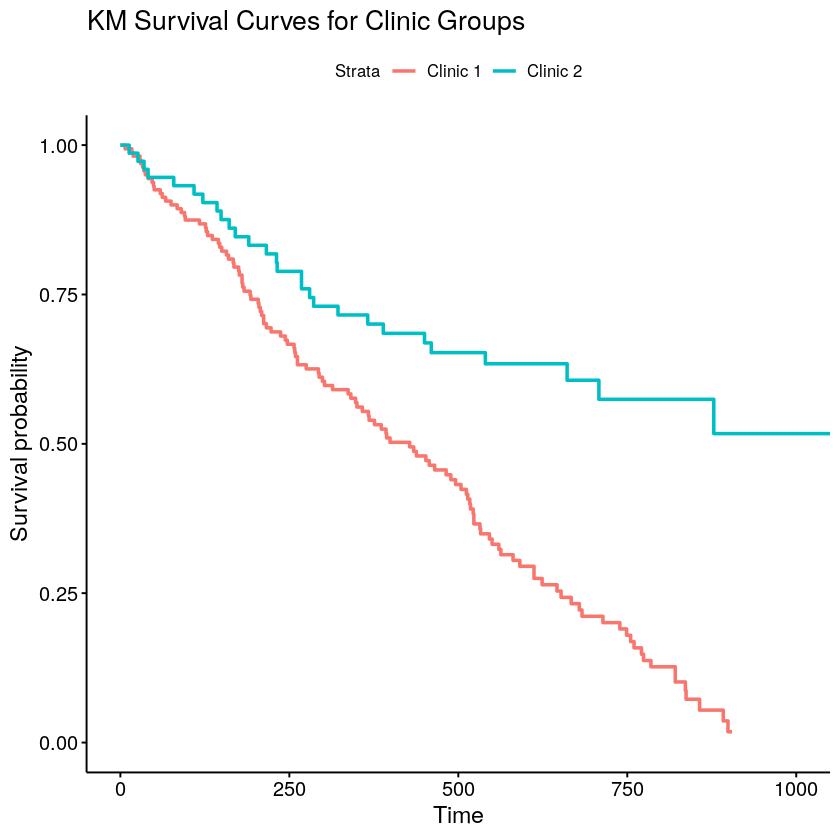

In [ ]:
ggsurvplot(KMcurves, legend.labs=c("Clinic 1", "Clinic 2"), xlab = "Time",title = "KM Survival Curves for Clinic Groups", censor = F)

From the KM curves it appears that the Clinic 2 group has higher survival probability at all time points. We can also see that the longest observed time in the Clinic 2 group is about 1000 days while we have some observations in the Clinic 1 group at roughly 850 days. In Clinic 2 group we see a steep drop, followed a somewhat steady survival probability, while for Clinic 1 group continuous steeper decline in survival probability over time. The Clinic 2 group reaches 50% survival probability around 850 days while the Clinic 1 group reaches 50% survival probability around 400 days.

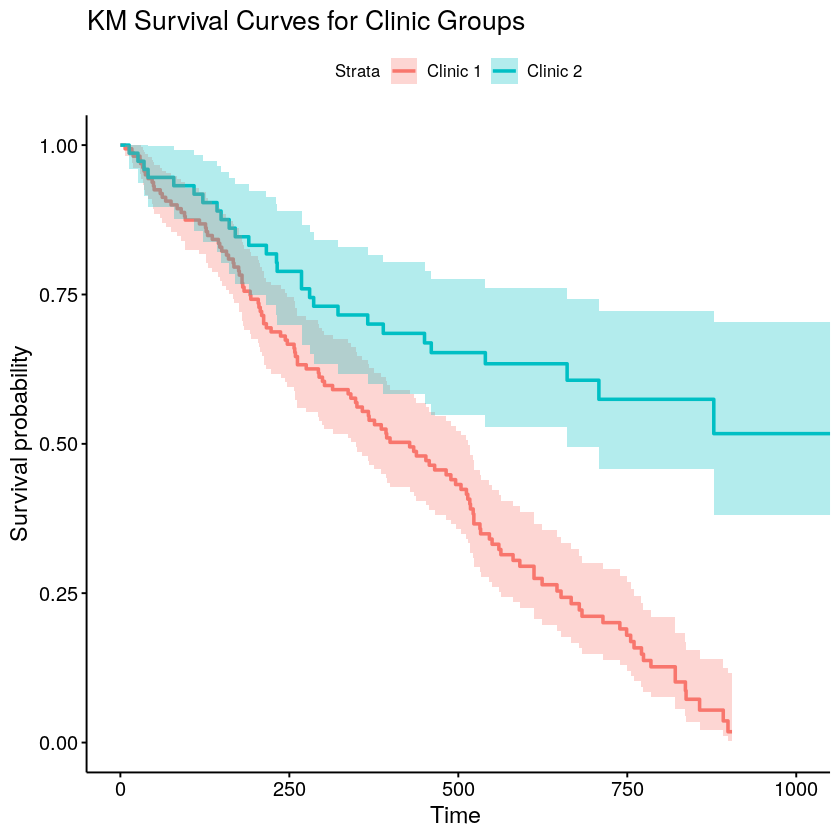

In [ ]:
ggsurvplot(KMcurves, conf.int = TRUE, legend.labs=c("Clinic 1", "Clinic 2"), xlab = "Time ",title = "KM Survival Curves for Clinic Groups", censor = F)

### **Q2**

In [ ]:
survdiff(survival ~ clinic, data = addicts)

Call:
survdiff(formula = survival ~ clinic, data = addicts)

            N Observed Expected (O-E)^2/E (O-E)^2/V
clinic=1  163      122     90.9      10.6      27.9
clinic= 2  75       28     59.1      16.4      27.9

 Chisq= 27.9  on 1 degrees of freedom, p= 1e-07 

The test gives a p-value of $10^{-07}$. This means the data provides enough evidence to suggest that the KM survival curves are significantly different

### **Q3**

In [ ]:
na_curves <- survfit(survival~ clinic ,type = "fleming-harrington", data = addicts)

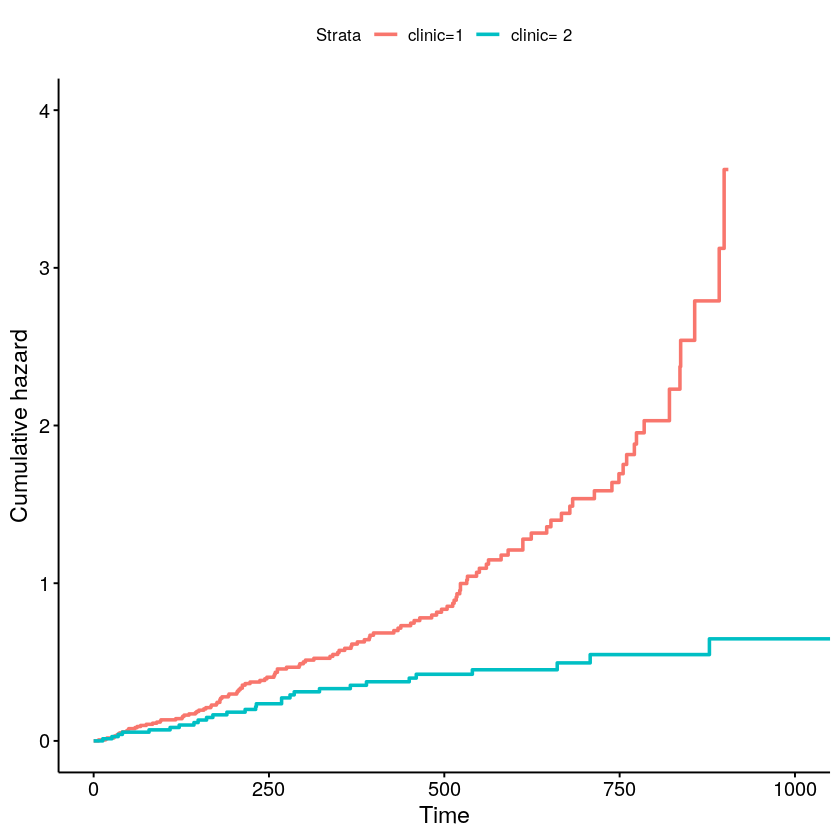

In [ ]:
ggsurvplot(na_curves, fun = "cumhaz",  main = "Nelson-Aalen Cumulative Hazard", ylim = c(0,4), censor = FALSE)

We see from the Nelson-Aalen hazard estimates that the Clinic 1 group has greater cumulative hazard at all time points. This was also seen in the survival curves because the Clinic 1 group had lower survival probabilities and thus greater cumulative hazard.

### **Q4**

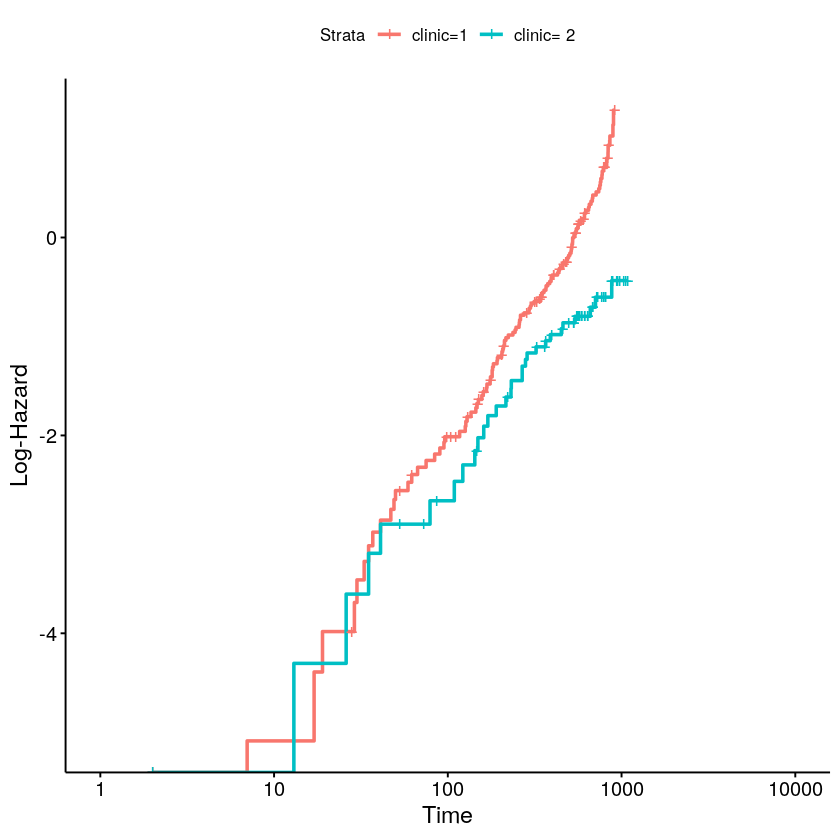

In [ ]:
ggsurvplot(na_curves, fun = "cloglog", main = "Complementary log−log", xlab = "Time", ylab = "Log-Hazard")

From the complimentary log-log plot, we see that the hazard curve for both clinics are roughly proportional. However since this is not a straight line, we cannot say for certain that the Weibull distribution may be appropriate model for the failure times.

### **Q5**

In [ ]:

cox_model_1 <- coxph(survival~ clinic, data = addicts)
print(summary(cox_model_1))

Call:
coxph(formula = survival ~ clinic, data = addicts)

  n= 238, number of events= 150 

            coef exp(coef) se(coef)      z Pr(>|z|)    
clinic 2 -1.0754    0.3412   0.2127 -5.057 4.26e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         exp(coef) exp(-coef) lower .95 upper .95
clinic 2    0.3412      2.931    0.2249    0.5176

Concordance= 0.574  (se = 0.022 )
Likelihood ratio test= 30.99  on 1 df,   p=3e-08
Wald test            = 25.57  on 1 df,   p=4e-07
Score (logrank) test = 27.92  on 1 df,   p=1e-07



At alpha level of 0.05, the clinic variable is statistically significant with a p-value of $4.26*10^{-07}$. This there is a difference in the "survival" of the two clinics. with an estinated hazard rik of 0.3412. A 95% confidence interval is (0.2249, 0.5176)

### **Q6**

We pick the Likelihood Ratio Test, from the R output in part 5, we see that at alpha level of 0.05 the clinics differ and there is a statistical significance. The p-value of the test is $3*10^{-08}$. This is the same for the other test too (Wald p-value = $4*10^{-07}$, Score p-value = $10^{-07}$). Since we have just one variable, all three test are equivalent. However for larger number of covariates, LRT's yields better and more stable with faster convergence result. Also, LRT works best when the sample is small.

### **Q7**

In [ ]:
cox_model_2 <- coxph(survival~ clinic + prison + methadone, data = addicts)
print(summary(cox_model_2))

Call:
coxph(formula = survival ~ clinic + prison + methadone, data = addicts)

  n= 238, number of events= 150 

               coef exp(coef)  se(coef)      z Pr(>|z|)    
clinic 2  -1.009896  0.364257  0.214889 -4.700 2.61e-06 ***
prisonYes  0.326555  1.386184  0.167225  1.953   0.0508 .  
methadone -0.035369  0.965249  0.006379 -5.545 2.94e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
clinic 2     0.3643     2.7453    0.2391    0.5550
prisonYes    1.3862     0.7214    0.9988    1.9238
methadone    0.9652     1.0360    0.9533    0.9774

Concordance= 0.665  (se = 0.025 )
Likelihood ratio test= 64.56  on 3 df,   p=6e-14
Wald test            = 54.12  on 3 df,   p=1e-11
Score (logrank) test = 56.32  on 3 df,   p=4e-12



In [ ]:
print(drop1(cox_model_2, test = "Chisq"))

Single term deletions

Model:
survival ~ clinic + prison + methadone
          Df    AIC     LRT  Pr(>Chi)    
<none>       1352.5                      
clinic     1 1376.9 26.3506 2.847e-07 ***
prison     1 1354.3  3.7727   0.05209 .  
methadone  1 1381.3 30.7820 2.887e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


From the R otput for the CoxPH model summary, we see that the  prison variable is not statistically significant. Using the AIC, we see that removing the prison variable gives the lowest AIC, which means it makes the model worse.

We cannot remove the Methadone variable as removing it has the highest AIC value.

### **Q8**

In [ ]:
cox_model_3 <- coxph(survival~ clinic  + methadone, data = addicts)
print(summary(cox_model_3))

Call:
coxph(formula = survival ~ clinic + methadone, data = addicts)

  n= 238, number of events= 150 

               coef exp(coef)  se(coef)      z Pr(>|z|)    
clinic 2  -0.950878  0.386402  0.212079 -4.484 7.34e-06 ***
methadone -0.034327  0.966255  0.006274 -5.471 4.47e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

          exp(coef) exp(-coef) lower .95 upper .95
clinic 2     0.3864      2.588    0.2550    0.5855
methadone    0.9663      1.035    0.9544    0.9782

Concordance= 0.659  (se = 0.025 )
Likelihood ratio test= 60.79  on 2 df,   p=6e-14
Wald test            = 52.68  on 2 df,   p=4e-12
Score (logrank) test = 54.25  on 2 df,   p=2e-12



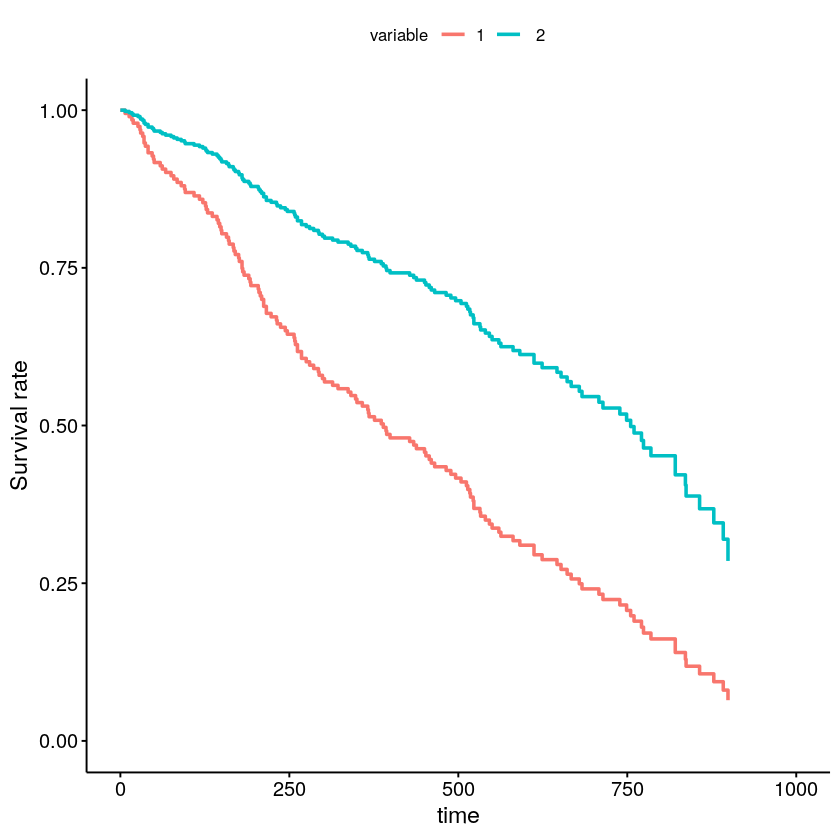

In [ ]:
ggadjustedcurves(cox_model_3, variable = "clinic", data = addicts, xlim = c(0,1000))

##### **Using the mean**

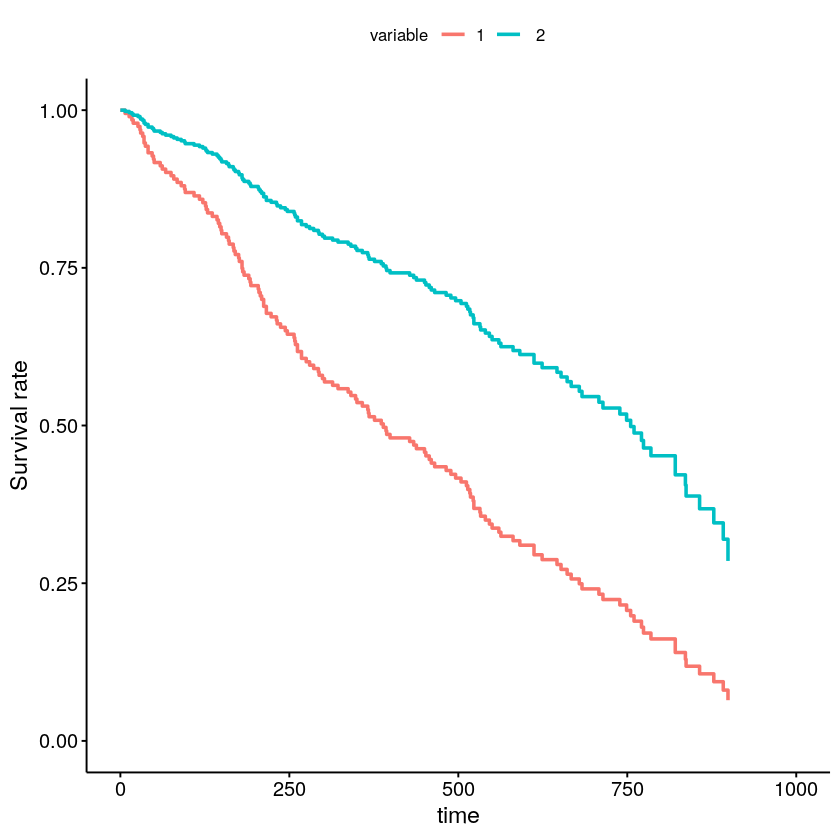

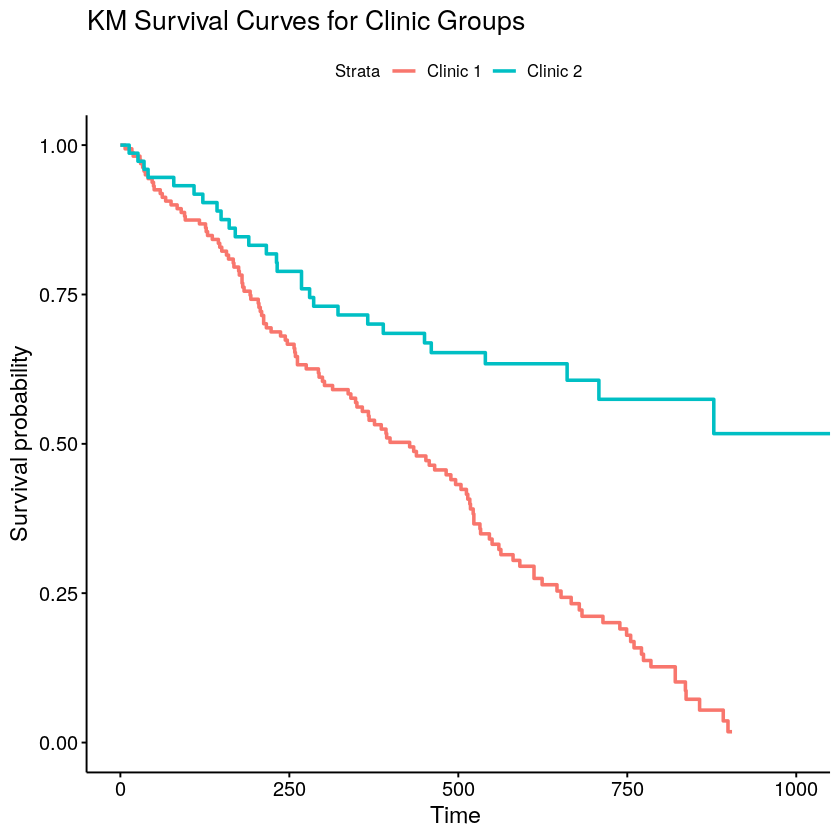

In [ ]:
ggadjustedcurves(cox_model_3, variable = "clinic", data = addicts, xlim = c(0,1000)) 
ggsurvplot(KMcurves, legend.labs=c("Clinic 1", "Clinic 2"), xlab = "Time ",title = "KM Survival Curves for Clinic Groups", censor = F)



In [ ]:

mean_per_group_df = addicts %>% group_by(clinic) %>% summarize(methadone = round(mean(methadone)))
mean_per_group_df

clinic,methadone
<fct>,<dbl>
1,59
2,64


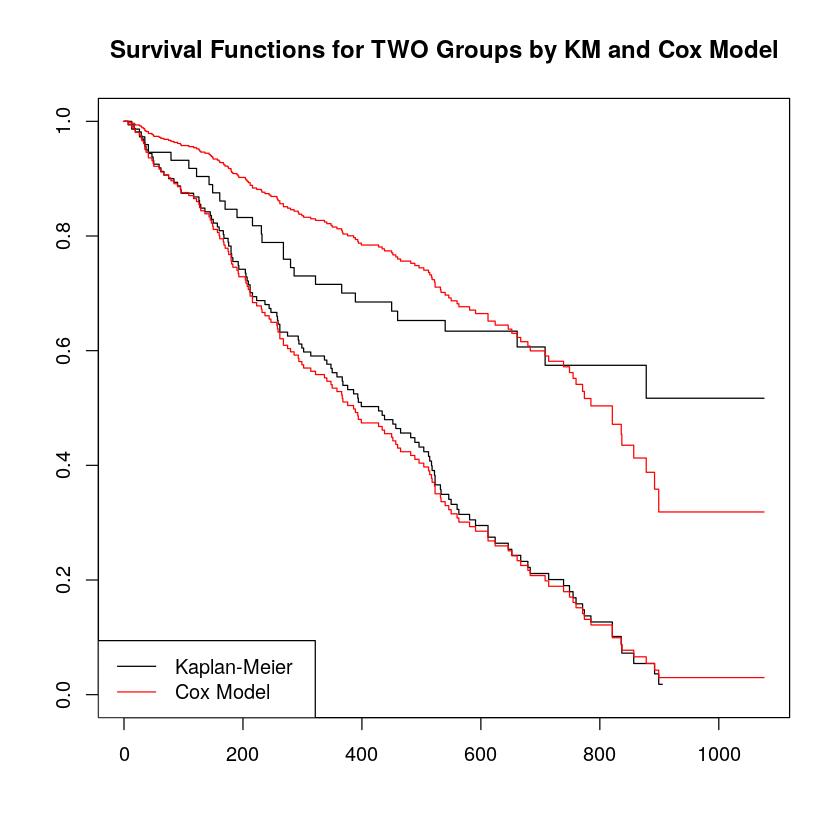

In [ ]:
plot(KMcurves)
lines(survfit(cox_model_3,mean_per_group_df,conf.int=F),col="red")
legend("bottomleft",c("Kaplan-Meier","Cox Model"),col=c("black","red"),lwd=1)
title("Survival Functions for TWO Groups by KM and Cox Model")

We can see that the K-M curve and CoxPH plots are similar for group 1.

In [ ]:
new_data = rbind(head(addicts[addicts$clinic == 1,], 3), head(addicts[addicts$clinic != 1,],3))
new_data

,id,clinic,status,time,prison,methadone
,<int>,<fct>,<int>,<int>,<fct>,<int>
1,1,1,1,428,No,50
2,2,1,1,275,Yes,55
3,3,1,1,262,No,55
98,103,2,1,708,Yes,60
99,104,2,0,713,No,50
100,105,2,0,146,No,50


Warning message in model.frame.default(data = structure(list(clinic = 1:2, methadone = c(55, :
“variable 'clinic' is not a factor”


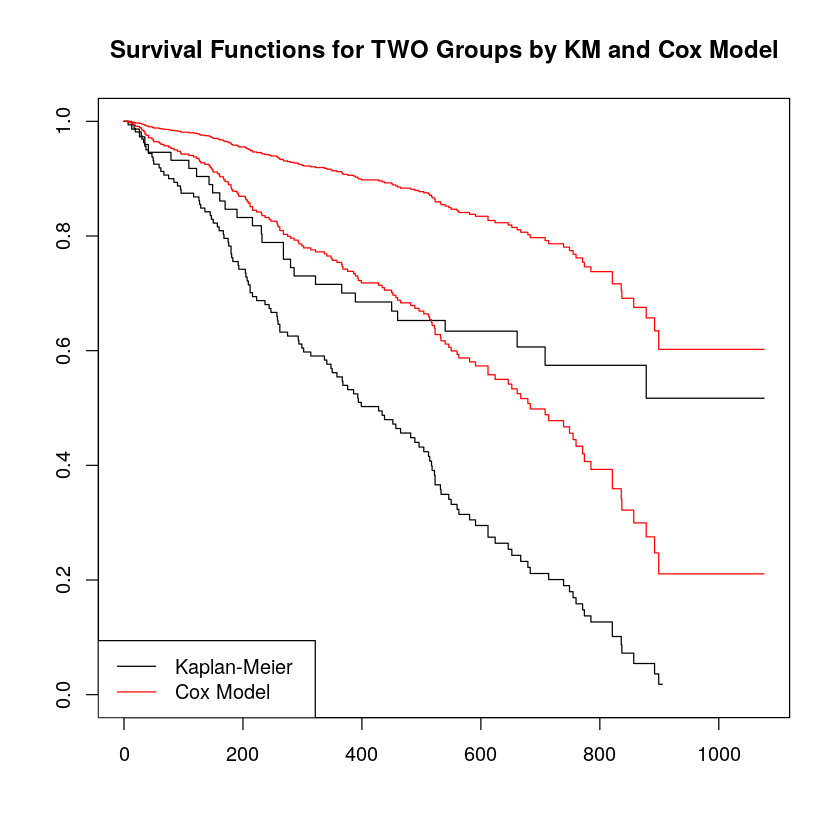

In [ ]:
plot(KMcurves)
lines(survfit(cox_model_3, data.frame(clinic = 1:2, methadone = c(55,60)),conf.int=F),col="red")
legend("bottomleft",c("Kaplan-Meier","Cox Model"),col=c("black","red"),lwd=1)
title("Survival Functions for TWO Groups by KM and Cox Model")

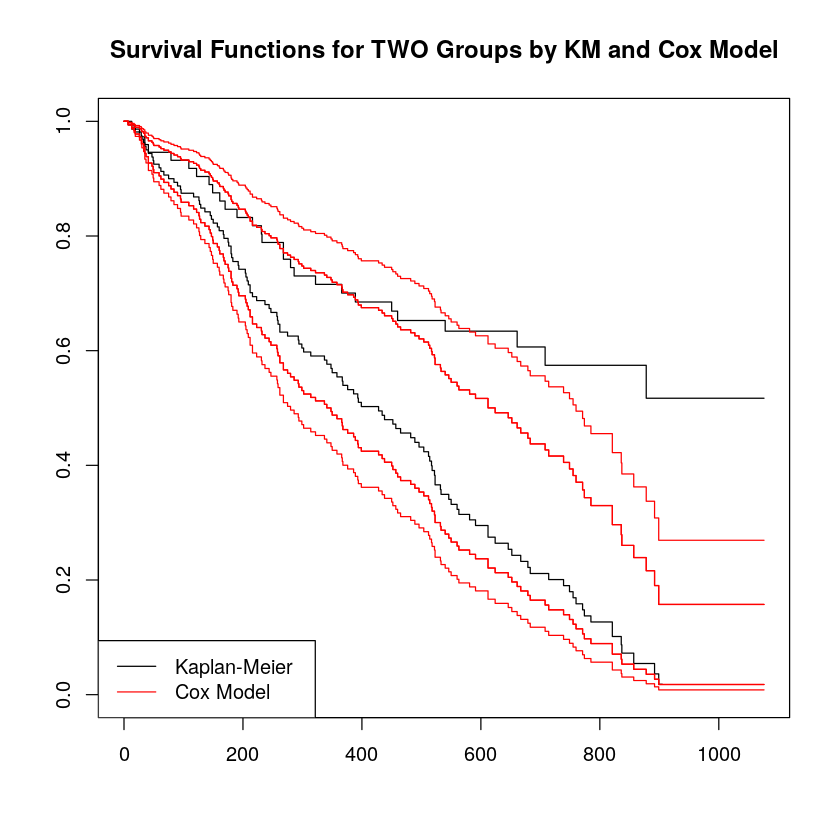

In [ ]:
plot(KMcurves)
lines(survfit(cox_model_3, new_data,conf.int=F),col="red")
legend("bottomleft",c("Kaplan-Meier","Cox Model"),col=c("black","red"),lwd=1)
title("Survival Functions for TWO Groups by KM and Cox Model")

We can see that overall, the K-M Curves and CoxPH survival estimates are close for group 1.

In [ ]:
system("apt-get install texlive texlive-xetex texlive-latex-extra pandoc")
system("pip install pypandoc")


In [ ]:

system("jupyter nbconvert --to HTML /content/BST_222_HW_3.ipynb")